# This notebook aims to analyse percolation in lattice networks

I will go through some simulations and calculations to best describe the behaviour of the lattice and the phenomena of percolation in Networks

Let's start importing some relevant modules

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#----------------------------------
# Function to create a lattice network 
def lattice(m, dorNd):
    
    """
    This is my implementation. You could directly import the Networkx implementation of the same function.
    Inputs:
    m: Number or either rows or columns
    dorNd: Boolean to set the diagonals accross the lattice. 
    
    Output:
    G: Lattice graph
    
    """
    
    G = nx.empty_graph()
    
    for i in range(1,m+1):
        for j in range(1,m+1):
            G.add_node((i,j),data=True)

    #Horizontal connections
    for i in range(1,m+1): 
        for j in range(1,m):
            G.add_edge((i,j),(i,j+1),data=True)
    
    #Vertical connections
    for j in range(1,m+1): 
        for i in range(1,m):
            G.add_edge((i,j),(i+1,j),data=True)
    
    if dorNd:
        #Diagonal connections
        for i in range(1,m):
            for j in range(1,m):
                 G.add_edge((i,j),(i+1,j+1),data=True)
            for l in range(2,m+1):
                 G.add_edge((i,l),(i+1,l-1),data=True)
    else:
        pass
    
    return G

In [3]:
# Testing
m = 7
G = lattice(m, False)

The next plot shows the lattice network with just the horizontal and vertical connections. The flag in the lattice function aims to create a lattice with diagonals. 

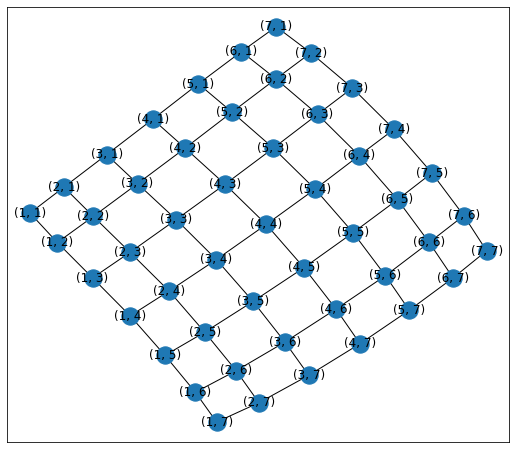

In [44]:
plt.figure(figsize=(9,8))
nx.draw_networkx(G)

In [10]:
# For loop to eliminate the links

def percolate_states(G,ps):
    
    """
    Function to determine whether a node percolates or not. By percolating I mean that the node allows to pass 
    whatever we want to pass through it. 
    
    Inputs.
    G: Graph (Network)
    ps: Probability of percolate
    
    Outputs.
    G: Graph with the 'percolated' paths
    
    """
    
    for node in G:
        rand_state = np.random.random()
        if ps < rand_state:
            neighbors = list(G.neighbors(node))
            for j in range(len(neighbors)):
                G.remove_edge(node,neighbors[j])
    return G

# The following function aims to determine whether exists a path from the top to the bottom


def ask_path_exists(g):
    """
    Function to test whether the network has paths from the top to the bottom (and viceversa)
    
    Input.
    g: Graph or network
    
    Output.
    flag: Boolean to indicate whether the network percolates or not
    """
    
    nodes = list(g.nodes())
    j = 5
    flag = False

    for i in range(m):   
        for index in range(m**2-j,m**2):
            if nx.has_path(g,nodes[i],nodes[index]):
                flag = True
                break
            j -= 1
        if flag:
            break
    
    return flag


In [47]:
# Simple analysis

p=[0,0.2,0.4,0.5,0.6,0.8,1]

count_0 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[0])
    if ask_path_exists(percolatedGraph):
        count_0 += 1

count_02 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[1])
    if ask_path_exists(percolatedGraph):
        count_1 += 1

count_04 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[2])
    if ask_path_exists(percolatedGraph):
        count_04 += 1

count_05 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[3])
    if ask_path_exists(percolatedGraph):
        count_05 += 1

count_06 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[4])
    if ask_path_exists(percolatedGraph):
        count_06 += 1
        
count_08 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[5])
    if ask_path_exists(percolatedGraph):
        count_08 += 1

count_1 = 0
for i in range(10):
    g = G.copy()
    percolatedGraph = percolate_states(g,p[6])
    if ask_path_exists(percolatedGraph):
        count_1 += 1        



Text(0.5, 1.0, 'Percolated component versus probability of on/off nodes')

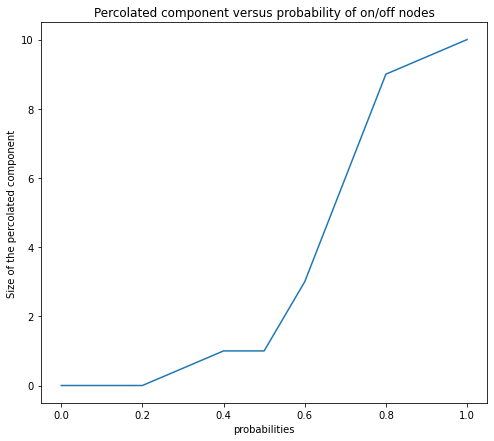

In [48]:
plt.figure(figsize=(8,7))
plt.plot(p,[count_0,count_02,count_04,count_05,count_06,count_08,count_1])
plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")

**Same but now, more smartly implemented (for loop to iterate over the array of probabilities)**

In [49]:
ps = np.linspace(0.5, 0.9, num=50)

counter_list = []
for p in ps:
    count = 0
    for i in range(48):
        g = G.copy()
        percolatedGraph = percolate_states(g,p)
        if ask_path_exists(percolatedGraph):
            count += 1
    counter_list.append(count)

Text(0.5, 1.0, 'Percolated component versus probability of on/off nodes')

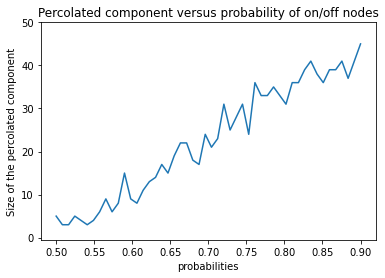

In [14]:
plt.plot(ps,counter_list)
plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.ylim(-0.5,50)
plt.title("Percolated component versus probability of on/off nodes")

**New 5 points added**

In [15]:
p_new=[0,0.2,0.4,0.5,0.6,0.625,0.65,0.675,0.7,0.725,0.8,1]
timeSteps = [10, 20, 50, 100, 500, 1000, 2000, 5000, 10000]

final_counter = []

for t in timeSteps:
    counter_list_new = []
    for p in p_new:
        count = 0
        for i in range(t):
            g = G.copy()
            percolatedGraph = percolate_states(g,p)
            if ask_path_exists(percolatedGraph):
                count += 1
        counter_list_new.append(count)
    final_counter.append(counter_list_new)

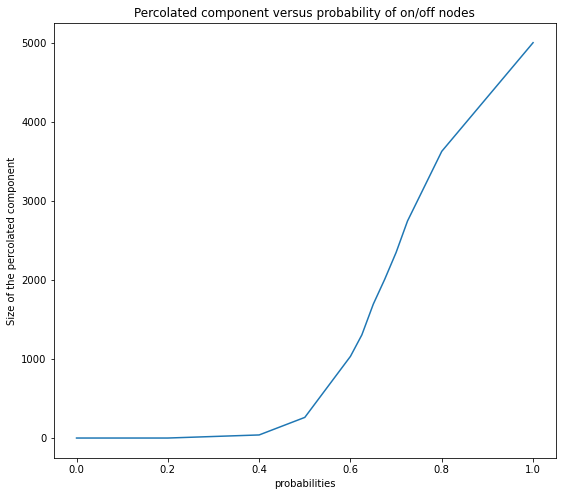

In [33]:
plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter[7])
plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.show()

## Analysis of the diagonal lattice

In [17]:
G_diag = lattice(m,True)

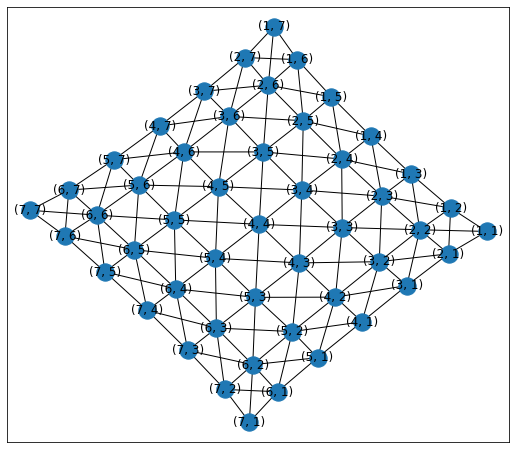

In [32]:
plt.figure(figsize=(9,8))
nx.draw_networkx(G_diag)

In [19]:
p_new=[0,0.2,0.4,0.5,0.6,0.625,0.65,0.675,0.7,0.725,0.8,1]
timeSteps = [10, 20, 50, 100, 500, 1000, 2000, 5000,10000]

final_counter_diag = []

for t in timeSteps:
    counter_list_diag = []
    for p in p_new:
        count = 0
        for i in range(t):
            g_diag = G_diag.copy()
            percolatedGraph_diag = percolate_states(g_diag,p)
            if ask_path_exists(percolatedGraph_diag):
                count += 1
        counter_list_diag.append(count)
    final_counter_diag.append(counter_list_diag)

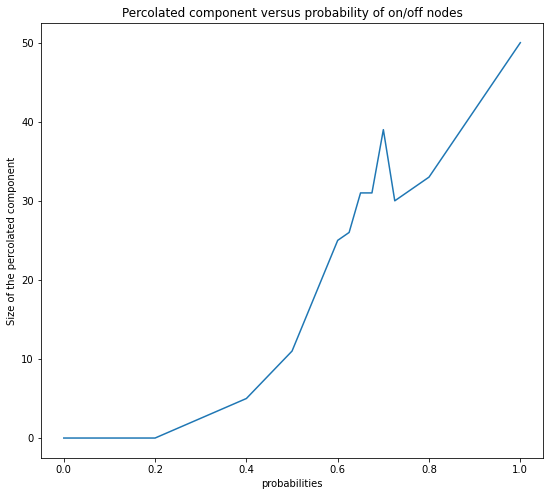

In [35]:
plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[2])
plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.show()

# Both plots all together

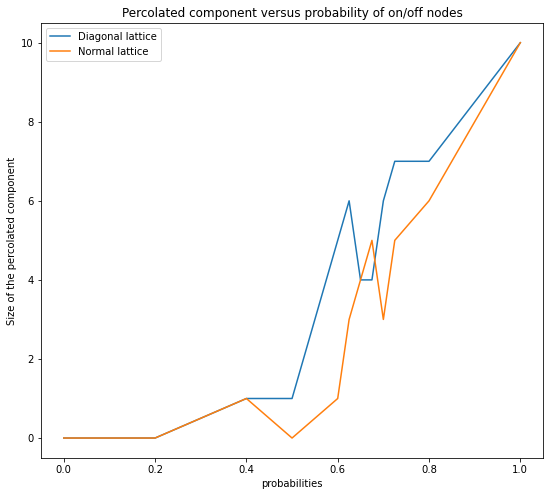

In [36]:
j = 0

plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[j], label="Diagonal lattice")
plt.plot(p_new,final_counter[j], label="Normal lattice")


plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.legend()
plt.show()

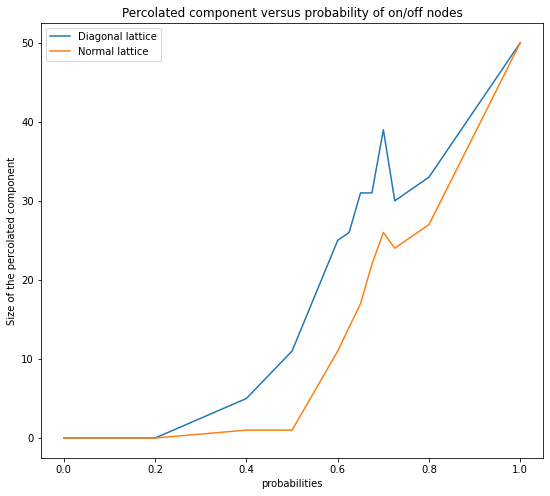

In [37]:
j = 2

plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[j], label="Diagonal lattice")
plt.plot(p_new,final_counter[j], label="Normal lattice")

plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.legend()
plt.show()

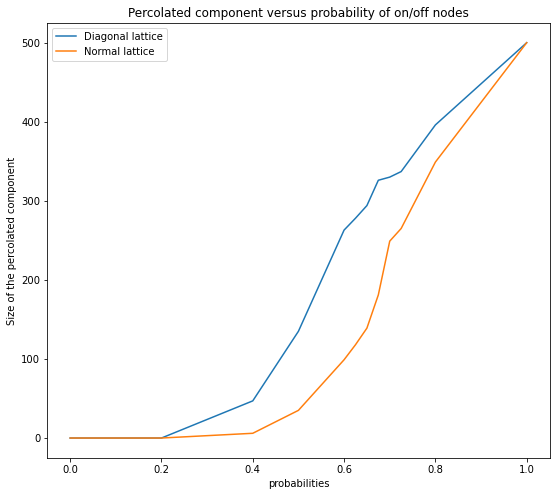

In [38]:
j = 4

plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[j], label="Diagonal lattice")
plt.plot(p_new,final_counter[j], label="Normal lattice")

plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.legend()
plt.show()

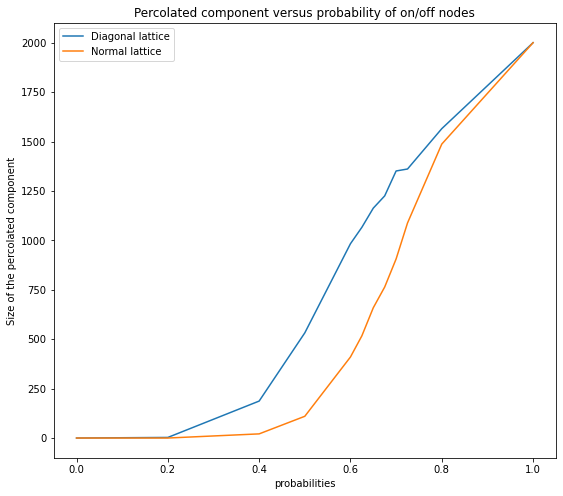

In [39]:
j = 6

plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[j], label="Diagonal lattice")
plt.plot(p_new,final_counter[j], label="Normal lattice")

plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.legend()
plt.show()

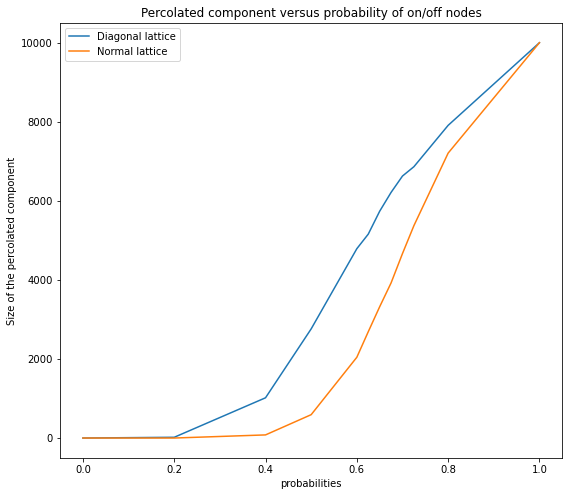

In [40]:
j = 8

plt.figure(figsize=(9,8))
plt.plot(p_new,final_counter_diag[j], label="Diagonal lattice")
plt.plot(p_new,final_counter[j], label="Normal lattice")

plt.xlabel("probabilities")
plt.ylabel("Size of the percolated component")
plt.title("Percolated component versus probability of on/off nodes")
plt.legend()
plt.show()

# Final thoughts

It is easy to see that the network with diagonals gives us more options of paths to get from the top nodes of the network to the ones in the bottom. So, as long as we include more way